## Instacart Analysis – Region Performance and Subset based on Orders (on 30% testing sample)
(as agreed with tutor Dana)
1.	Import library & set directory paths
2.	Import 30% sample group and reset_index
3.	Review dimensions, columns and data types of dataframe
4.	Export re-indexed dataframe for safe keeping
5.	Create Regional lists consisting of appropriate State names
6.	Use if-statement for-loop via a list to populate region based on State column
7.	Add region list from Step6 above to create ‘region’ column
8.	Calculate total spending by region using groupby() and transform
9.	Check value_counts() (revealed typo in lists in Step5).
10.	Create crosstab of ‘region’ vs ‘total_spend_region’
11.	Manually populate x (region) and y (total spend) lists for use in bar chart
12.	Use plt.bar() to display regional spending, and export to file
13.	Drop redundant column
14.	Assess low-revenue customers by calculating max_order.
15.	Created subset of customers with >5 orders
16.	Export subset to pickle file: sample_testing_keep.pkl



### import usual libraries plus visualisation tools

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### set data set directory path

In [2]:
datasetpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\02 Data Sets'
datasetpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\02 Data Sets'

### set visualisation directory path

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\04 Analysis'

### import 30% testing_sample group
owing to memory issues with full data set

In [4]:
df_testing = pd.read_pickle(os.path.join(datasetpath,'testing_sample.pkl'))
df_testing.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income,region,max_order
0,2539329,1,1,2,8,0.0,196,0,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
2,2254736,1,4,4,7,29.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
3,550135,1,7,1,9,20.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
6,473747,1,3,3,12,21.0,12427,1,Original Beef Jerky,19,4.4,Female,Alabama,31,3,married,40423,South,10
10,2539329,1,1,2,8,0.0,26405,0,XL Pick-A-Size Paper Towel Rolls,17,1.0,Female,Alabama,31,3,married,40423,South,10


### reset_index on dataframe, dropping old one at same time

In [5]:
df_testing = df_testing.reset_index(drop=True)

In [6]:
df_testing.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income
0,2539329,1,1,2,8,0.0,196,0,Soda,7,9.0,Female,Alabama,31,3,married,40423
1,473747,1,3,3,12,21.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423
3,550135,1,7,1,9,20.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423
4,2539329,1,1,2,8,0.0,14084,0,Organic Unsweetened Vanilla Almond Milk,16,12.5,Female,Alabama,31,3,married,40423


### review dimensions, columns & datatypes

In [7]:
df_testing.shape

(9721098, 17)

In [8]:
df_testing.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
dtype: object

#### all PII has been removed in previous version of the data, (first_name, surname)

### export re-indexed dataframe to pickle file

In [9]:
df_testing.to_pickle(os.path.join(datasetpath,'sample_indexed.pkl'))

## Create region lists containing relevant states

In [10]:
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
northeast

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [11]:
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri',]
midwest

['Wisconsin',
 'Michigan',
 'Illinois',
 'Indiana',
 'Ohio',
 'North Dakota',
 'South Dakota',
 'Nebraska',
 'Kansas',
 'Minnesota',
 'Iowa',
 'Missouri']

In [12]:
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
south

['Delaware',
 'Maryland',
 'District of Columbia',
 'Virginia',
 'West Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'Kentucky',
 'Tennessee',
 'Mississippi',
 'Alabama',
 'Oklahoma',
 'Texas',
 'Arkansas',
 'Louisiana']

In [13]:
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']
west

['Idaho',
 'Montana',
 'Wyoming',
 'Nevada',
 'Utah',
 'Colorado',
 'Arizona',
 'New Mexico',
 'Alaska',
 'Washington',
 'Oregon',
 'California',
 'Hawaii']

### create new 'region' column based on list content

In [14]:
region = []

for state in df_testing['state']:
  if state in northeast:
    region.append('Northeast')
  elif state in midwest:
    region.append('Midwest')
  elif state in south:
    region.append('South')
  elif state in west:
    region.append('West')
  else:
    region.append('unknown')

In [15]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Sout

### add region list as a new column in dataframe

In [16]:
df_testing['region'] = region

### re-check region column following type amendment

In [17]:
df_testing['region'].value_counts(dropna=False)

South        3238633
West         2488967
Midwest      2278151
Northeast    1715347
Name: region, dtype: int64

### OLD
### check region column population - found typo in list

In [17]:
df_testing['region'].value_counts(dropna=False)

South        3238633
West         2488967
Midwest      2088213
Northeast    1715347
unknown       189938
Name: region, dtype: int64

### NO LONGER REQUIRED
### create subset to review state for "unknowns"
    revealed typo in list and was subsequentally addressed.

In [18]:
df_unknown = df_testing[df_testing['region'] == 'unknown']
df_unknown.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income,region
469,2781919,195,25,1,14,4.0,196,1,Soda,7,9.0,Female,South Dakota,50,2,married,70952,unknown
470,3387727,195,20,1,10,10.0,13176,0,Bag of Organic Bananas,4,10.3,Female,South Dakota,50,2,married,70952,unknown
471,2661660,195,21,5,15,4.0,13176,1,Bag of Organic Bananas,4,10.3,Female,South Dakota,50,2,married,70952,unknown
472,373581,195,24,4,11,6.0,41787,0,Bartlett Pears,4,5.0,Female,South Dakota,50,2,married,70952,unknown
473,2781919,195,25,1,14,4.0,46149,1,Zero Calorie Cola,7,13.4,Female,South Dakota,50,2,married,70952,unknown


##### df_unknown revealed typo in region list "South Dakota" showing as "South akota"

## calculate spending per region by:
    1) create column to hold total spending per region
    2) groupby() region
    3) transform to calculated sum spend

In [18]:
df_testing['total_spend_region'] = df_testing.groupby(['region']) ['price'].transform(np.sum)

In [19]:
df_testing.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income,region,total_spend_region
0,2539329,1,1,2,8,0.0,196,0,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,2.524259e+07
1,473747,1,3,3,12,21.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,2.524259e+07
2,2254736,1,4,4,7,29.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,2.524259e+07
3,550135,1,7,1,9,20.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,2.524259e+07
4,2539329,1,1,2,8,0.0,14084,0,Organic Unsweetened Vanilla Almond Milk,16,12.5,Female,Alabama,31,3,married,40423,South,2.524259e+07


### review value counts for spending per region

In [20]:
df_testing[['region','total_spend_region']].value_counts()

region     total_spend_region
South      2.524259e+07          3238633
West       1.937710e+07          2488967
Midwest    1.774689e+07          2278151
Northeast  1.334074e+07          1715347
dtype: int64

### create crosstab for 'region' and 'total_spend_region'

In [21]:
cross_region = pd.crosstab(df_testing['region'],df_testing['total_spend_region'])

In [22]:
cross_region

total_spend_region,1.334074e+07,1.774689e+07,1.937710e+07,2.524259e+07
region,,,,
Midwest,0,2278151,0,0
Northeast,1715347,0,0,0
South,0,0,0,3238633
West,0,0,2488967,0


### create x and y asix data for bar chart

In [23]:
x = ['South','West','Midwest','Northeast']
x

['South', 'West', 'Midwest', 'Northeast']

In [24]:
y = [25.2,19.3,17.7,13.3]
y

[25.2, 19.3, 17.7, 13.3]

### create bar chart and export to file

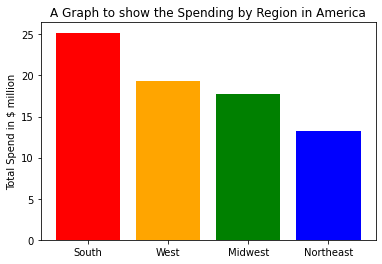

In [25]:
bar_regionspend = plt.bar(x,y, color=['red','orange','green','blue'])

plt.title('A Graph to show the Spending by Region in America')
plt.ylabel('Total Spend in $ million')

plt.savefig(os.path.join(vizpath,'Bar Chart to Show Spending by Region.jpg'))

#### The bar chart shows that more money is spent in the South than any other region.  This is likely to be attributed to the South having more customers.

### review columns

In [26]:
df_testing.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
region                     object
total_spend_region        float64
dtype: object

### drop column 'total_spend_region', as no longer needed

In [27]:
df_testing = df_testing.drop(columns=['total_spend_region'])
df_testing.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
region                     object
dtype: object

## Review low revenue customers by 'number_of_orders' placed

### create 'max_order' column per customer

In [28]:
df_testing['max_order'] = df_testing.groupby(df_testing['user_id']) ['number_of_orders'].transform(np.max)

In [29]:
df_testing.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income,region,max_order
0,2539329,1,1,2,8,0.0,196,0,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
1,473747,1,3,3,12,21.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
2,2254736,1,4,4,7,29.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
3,550135,1,7,1,9,20.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
4,2539329,1,1,2,8,0.0,14084,0,Organic Unsweetened Vanilla Almond Milk,16,12.5,Female,Alabama,31,3,married,40423,South,10


### mark customers with <5 orders low-activity flag
    mark others with "OK"

In [30]:
df_testing.loc[df_testing['max_order'] <5, 'order_activity'] = 'Low'

In [31]:
df_testing.loc[df_testing['max_order'] >=5, 'order_activity'] = 'OK'

### create subset where 'order_activity' == OK

In [32]:
df_testing_keep = df_testing[df_testing['order_activity'] =='OK']
df_testing_keep.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income,region,max_order,order_activity
0,2539329,1,1,2,8,0.0,196,0,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10,OK
1,473747,1,3,3,12,21.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10,OK
2,2254736,1,4,4,7,29.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10,OK
3,550135,1,7,1,9,20.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10,OK
4,2539329,1,1,2,8,0.0,14084,0,Organic Unsweetened Vanilla Almond Milk,16,12.5,Female,Alabama,31,3,married,40423,South,10,OK


In [33]:
df_testing_keep.shape

(9268148, 20)

### check subset values for column 'order_activity'

In [34]:
df_testing_keep['order_activity'].value_counts(dropna=False)

OK    9268148
Name: order_activity, dtype: int64

### drop column 'order_activity'

In [35]:
df_testing_keep = df_testing_keep.drop(columns=['order_activity'])

In [36]:
df_testing_keep.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
region                     object
max_order                   int64
dtype: object

### export revised dataframe

In [37]:
df_testing_keep.to_pickle(os.path.join(datasetpath,'sample_testing_keep.pkl'))

In [38]:
df_testing_keep.shape

(9268148, 19)